Importing libraries

In [1]:
import pandas as pd
import numpy as np
import joblib

Loading the data

In [2]:
data = joblib.load('ims_data')

Creating dataframe from data

In [3]:
df = pd.DataFrame(data, columns=['id', 'im_data'])

In [4]:
df.head()

,id,im_data
0,00009f42-5d0e-4315-8c81-291aaf17cfad,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,0008b7ed-ffca-44a3-93c4-0b82592f5f29,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,00234e78-17b3-49c0-96c7-b6d58ee9a874,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,002432ba-3741-455a-a06c-f07393cd9a9e,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,00254ecb-442a-41f0-beaa-11dc613b8dd1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [5]:
df.shape

(12604, 2)

Product id is needed for each image so creating a df from the Images csv file which has unique id and product id for each image

In [6]:
images_df = pd.read_csv('Images.csv')

In [7]:
images_df.columns

Index(['Unnamed: 0', 'id', 'product_id', 'bucket_link', 'image_ref',
       'create_time'],
      dtype='object')

In [8]:
images_df.shape

(12604, 6)

In [9]:
images_df.head()

,Unnamed: 0,id,product_id,bucket_link,image_ref,create_time
0,0,912bb259-3ad9-457b-9db1-ce1da9016057,5f5f57d7-778f-4336-bb10-b43863418c8c,https://aicore-projects-datasets-prod.s3.eu-we...,koQAAOSwhZRiE5dD,2022-02-26
1,1,b166d305-b852-4bdd-83f4-465b20da94fa,5f5f57d7-778f-4336-bb10-b43863418c8c,https://aicore-projects-datasets-prod.s3.eu-we...,9vgAAOSw8sRiE5dE,2022-02-26
2,2,68f5a29d-0075-4d60-81c1-ab684a82e50c,c2c8949f-3cde-4651-a234-4a4a1b2a9ad4,https://aicore-projects-datasets-prod.s3.eu-we...,FlwAAOSwCkpiFNlV,2022-02-26
3,3,f6a309d7-d247-446a-9b5e-aceefdd4334d,c2c8949f-3cde-4651-a234-4a4a1b2a9ad4,https://aicore-projects-datasets-prod.s3.eu-we...,4gIAAOSw4ORiFNlZ,2022-02-26
4,4,2c2b3a6f-15b3-4289-937a-15482d9f5781,8292aa4e-7f1b-4655-bf0e-f1f2c9e3ffaf,https://aicore-projects-datasets-prod.s3.eu-we...,sHoAAOSwQoRiD7vf,2022-02-26


Merging both dfs to have product id for each image

In [10]:
df = df.merge(images_df, on='id')

In [11]:
df.shape

(12604, 7)

In [12]:
df.columns

Index(['id', 'im_data', 'Unnamed: 0', 'product_id', 'bucket_link', 'image_ref',
       'create_time'],
      dtype='object')

Dropping unneeded columns

In [13]:
df = df.drop(['id', 'Unnamed: 0', 'bucket_link', 'image_ref', 'create_time'], axis=1)

In [14]:
df.columns

Index(['im_data', 'product_id'], dtype='object')

In [15]:
df.shape

(12604, 2)

Create df for Products csv which has category data on each product

In [16]:
product_df = pd.read_csv('./data/Products.csv', lineterminator='\n')

In [17]:
product_df.columns

Index(['Unnamed: 0', 'id', 'product_name', 'category', 'product_description',
       'price', 'location', 'url', 'page_id', 'create_time'],
      dtype='object')

In [18]:
product_df.shape

(7156, 10)

Renaming column for merging

In [19]:
product_df.rename({'id' : 'product_id'}, axis=1, inplace=True)

In [20]:
product_df.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'category',
       'product_description', 'price', 'location', 'url', 'page_id',
       'create_time'],
      dtype='object')

Merge both dfs so each image has the info from the products df

In [21]:
df = df.merge(product_df, on='product_id', how='left')

In [22]:
df.shape

(12604, 11)

In [23]:
df.columns

Index(['im_data', 'product_id', 'Unnamed: 0', 'product_name', 'category',
       'product_description', 'price', 'location', 'url', 'page_id',
       'create_time'],
      dtype='object')

In [24]:
df.head()

,im_data,product_id,Unnamed: 0,product_name,category,product_description,price,location,url,page_id,create_time
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",8ddabc6d-8b1f-49cb-b529-86284955df19,645,"KING SIZE BEDDING | in Bedminster, Bristol | G...",Home & Garden / Beds & Bedroom Furniture / Lin...,Sets of king size bedding 1 mocha color duvet ...,£50.00,"Bedminster, Bristol",https://www.gumtree.com/p/linen-bedding/king-s...,1426262205,2022-02-26
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",fe3da19a-4cb7-4eae-b7ac-b36fa2f6f2e6,3307,Candy condenser tumble dryer new | in Aberdeen...,Appliances / Tumble Dryers,White freestanding dryer Condenser Candy Cs C9...,£195.00,Aberdeen,https://www.gumtree.com/p/tumble-dryers/candy-...,1426338405,2022-02-27
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",45880a72-dd3d-4ff7-b9bf-8813c71a29e0,6429,Office storage cabinet with lock and key - can...,Office Furniture & Equipment / Office Furnitur...,"Overall in very good condition. Length 80 cm, ...",£50.00,"Harborne, West Midlands",https://www.gumtree.com/p/storage-filing/offic...,1426704161,2022-02-27
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",7d7d3fc3-ed8f-4857-b7dc-a01fdbd8fc2f,341,Brand new unused blind. Ordered wrong size | i...,"Home & Garden / Dining, Living Room Furniture ...",White blind Size 116 cm width x 56 cams dep...,£50.00,"Eastleigh, Hampshire",https://www.gumtree.com/p/curtains-blinds-wind...,1349403483,2022-02-26
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",64d3b413-7c66-4b20-b781-85284bd6fdf4,597,Light up corner unit display cabinet | in Norw...,Home & Garden / Beds & Bedroom Furniture / War...,Plug-in corner unit display cabinet with three...,£10.00,"Norwich, Norfolk",https://www.gumtree.com/p/wardrobes-shelving-s...,1426705271,2022-02-26


In [25]:
df = df.dropna(subset=['category'])

In [26]:
df.shape

(12604, 11)

Most, if not all, products had two images. Therefore, there should be (mostly) two entries for each product id which will be checked:

In [27]:
df.sort_values('product_id')

,im_data,product_id,Unnamed: 0,product_name,category,product_description,price,location,url,page_id,create_time
1853,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",000bfa09-a91e-42ee-a2c8-0512ed6d3dbb,2553,"Bicycle | in Donegall Road, Belfast | Gumtree","Sports, Leisure & Travel / Bicycles",Women's mountain bike bossGood conditionWheels...,£115.00,"Donegall Road, Belfast",https://www.gumtree.com/p/bicycles/bicycle/142...,1426713872,2022-02-27
3190,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",000bfa09-a91e-42ee-a2c8-0512ed6d3dbb,2553,"Bicycle | in Donegall Road, Belfast | Gumtree","Sports, Leisure & Travel / Bicycles",Women's mountain bike bossGood conditionWheels...,£115.00,"Donegall Road, Belfast",https://www.gumtree.com/p/bicycles/bicycle/142...,1426713872,2022-02-27
10701,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",000e4808-0c14-496d-bbe9-15f675b07ff5,1762,Polen 20+50+100+200+500+1000 zł 6pcs UNC | in ...,"Other Goods / Hobbies, Interests & Collectibles",For sale: Polen 20+50+100+200+500+1000 zł 6pcs...,£11.00,"Westminster, London",https://www.gumtree.com/p/hobbies-collectibles...,1424551703,2022-02-27
3777,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",000e4808-0c14-496d-bbe9-15f675b07ff5,1762,Polen 20+50+100+200+500+1000 zł 6pcs UNC | in ...,"Other Goods / Hobbies, Interests & Collectibles",For sale: Polen 20+50+100+200+500+1000 zł 6pcs...,£11.00,"Westminster, London",https://www.gumtree.com/p/hobbies-collectibles...,1424551703,2022-02-27
11392,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0011ab0d-aaa1-4d48-9633-2711cf805a78,4035,Oasis American Supernova CD | in Aberdeen | Gu...,"Music, Films, Books & Games / Music / CDs","One you wont find in the shops for collectors,...",£5.00,Aberdeen,https://www.gumtree.com/p/cds/oasis-american-s...,1426715333,2022-02-27
...,...,...,...,...,...,...,...,...,...,...,...
666,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",ffee27c1-e1fe-4590-98e2-f93a895474bc,2764,Victorian Black & Red Tiles 6x6 in; Reclaimed ...,DIY Tools & Materials / Building Materials / C...,These exquisite original tiles have been recov...,£397.00,"Stamford, Lincolnshire",https://www.gumtree.com/p/ceramic-tiles/victor...,1420344007,2022-02-27
274,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",fff2371b-b080-47dc-96a3-c717ed41640a,3273,Miele washing machine 7kg 1400 spin mint condi...,Appliances / Washing Machines,Miele washing machineModel 33701400 spin speed...,£295.00,"Blackburn, Lancashire",https://www.gumtree.com/p/washing-machines/mie...,1426720625,2022-02-27
316,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",fff2371b-b080-47dc-96a3-c717ed41640a,3273,Miele washing machine 7kg 1400 spin mint condi...,Appliances / Washing Machines,Miele washing machineModel 33701400 spin speed...,£295.00,"Blackburn, Lancashire",https://www.gumtree.com/p/washing-machines/mie...,1426720625,2022-02-27
12398,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",fffbb9f5-423d-470a-a0d5-018177258d8b,4738,Kingston HyperX Beast 16GB (2x8GB) PC3-17100C1...,"Computers & Software / Computers, Laptops & Ne...",Gaming PC RAM Kingston HyperX Beast 16GB Kit (...,£80.00,"Brighton, East Sussex",https://www.gumtree.com/p/memory-motherboards-...,1422093138,2022-02-27


Get rid of sub hierarchys of Category column, only keep top level:

In [28]:
df['category'] = df['category'].str.split('/', expand=True)[0]

In [29]:
df.columns

Index(['im_data', 'product_id', 'Unnamed: 0', 'product_name', 'category',
       'product_description', 'price', 'location', 'url', 'page_id',
       'create_time'],
      dtype='object')

In [30]:
df.head()

,im_data,product_id,Unnamed: 0,product_name,category,product_description,price,location,url,page_id,create_time
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",8ddabc6d-8b1f-49cb-b529-86284955df19,645,"KING SIZE BEDDING | in Bedminster, Bristol | G...",Home & Garden,Sets of king size bedding 1 mocha color duvet ...,£50.00,"Bedminster, Bristol",https://www.gumtree.com/p/linen-bedding/king-s...,1426262205,2022-02-26
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",fe3da19a-4cb7-4eae-b7ac-b36fa2f6f2e6,3307,Candy condenser tumble dryer new | in Aberdeen...,Appliances,White freestanding dryer Condenser Candy Cs C9...,£195.00,Aberdeen,https://www.gumtree.com/p/tumble-dryers/candy-...,1426338405,2022-02-27
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",45880a72-dd3d-4ff7-b9bf-8813c71a29e0,6429,Office storage cabinet with lock and key - can...,Office Furniture & Equipment,"Overall in very good condition. Length 80 cm, ...",£50.00,"Harborne, West Midlands",https://www.gumtree.com/p/storage-filing/offic...,1426704161,2022-02-27
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",7d7d3fc3-ed8f-4857-b7dc-a01fdbd8fc2f,341,Brand new unused blind. Ordered wrong size | i...,Home & Garden,White blind Size 116 cm width x 56 cams dep...,£50.00,"Eastleigh, Hampshire",https://www.gumtree.com/p/curtains-blinds-wind...,1349403483,2022-02-26
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",64d3b413-7c66-4b20-b781-85284bd6fdf4,597,Light up corner unit display cabinet | in Norw...,Home & Garden,Plug-in corner unit display cabinet with three...,£10.00,"Norwich, Norfolk",https://www.gumtree.com/p/wardrobes-shelving-s...,1426705271,2022-02-26


In [31]:
df.shape

(12604, 11)

Drop unneeded columns, only keeping image array and category

In [32]:
df = df.drop(['product_id', 'Unnamed: 0', 'product_name', 'product_description', 'price', 'location', 'url', 'page_id', 'create_time'], axis=1)

Flattening arrays

In [33]:
df['flat_array'] = df['im_data'].apply(lambda x : x.flatten())

In [34]:
df.head()

,im_data,category,flat_array
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Home & Garden,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Appliances,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Office Furniture & Equipment,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Home & Garden,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Home & Garden,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [35]:
df.shape

(12604, 3)

In [36]:
df.columns

Index(['im_data', 'category', 'flat_array'], dtype='object')

Encode category labels

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

In [39]:
cat_le = le.fit_transform(df['category'])

In [40]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'Appliances ': 0,
 'Baby & Kids Stuff ': 1,
 'Clothes, Footwear & Accessories ': 2,
 'Computers & Software ': 3,
 'DIY Tools & Materials ': 4,
 'Health & Beauty ': 5,
 'Home & Garden ': 6,
 'Music, Films, Books & Games ': 7,
 'Office Furniture & Equipment ': 8,
 'Other Goods ': 9,
 'Phones, Mobile Phones & Telecoms ': 10,
 'Sports, Leisure & Travel ': 11,
 'Video Games & Consoles ': 12}

In [41]:
df['cat_le'] = cat_le.tolist()

In [42]:
df.head()

,im_data,category,flat_array,cat_le
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Home & Garden,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Appliances,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Office Furniture & Equipment,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Home & Garden,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Home & Garden,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6


Creating dataframe to use for torch dataset to use later:

In [43]:
# products_df = df

In [44]:
# products_df.drop(['category', 'flat_array'], axis=1, inplace=True)

In [45]:
# products_df.columns

In [46]:
# products_df.to_pickle("product_images_df.pkl")

Now just need flat array and label encoded category columns

In [47]:
df.drop(['im_data', 'category'], axis=1, inplace=True)

Using only about 10% of the dataset as not enough memory can be allocated on full dataset.

In [48]:
df = df.head(1260)

Setting X and y variables

In [49]:
X = df['flat_array'].values
y = df['cat_le'].values

Chosen KNeighbours Classifier for classification

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
parameters = {"n_neighbors": range(3, 10)}

In [54]:
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)

In [55]:
gridsearch.fit(X_train.tolist(), y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 10)})

In [56]:
gridsearch.best_score_

0.12473677452491012

In [57]:
gridsearch.best_params_

{'n_neighbors': 8}

Will use n_neighbours = 7

Scaling the data:

In [58]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train.tolist())

In [62]:
X_test = sc.transform(X_test.tolist())

Create and train model:

In [63]:
knn = KNeighborsClassifier(n_neighbors=7)

In [64]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Make a prediction and evaluate:

In [65]:
y_pred = knn.predict(X_test)

In [66]:
y_test[12]

8

In [67]:
y_pred[12]

6

Evaluation metrics:

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
accuracy_score(y_test, y_pred)

0.12698412698412698

In [70]:
cm = (y_test, y_pred)

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    plt.show()

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of ticklabels (2).

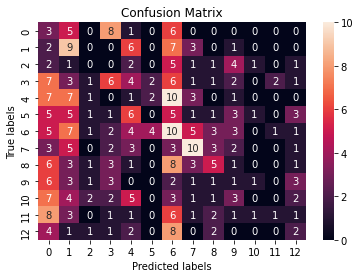

In [73]:
plot_confusion_matrix(y_test, y_pred)